In [78]:
##Figures for paper on comparing node influence in Boolean networks
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import json
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Figure 3

In [392]:
#cell collective times
with open('cell_collective_times_new.txt') as fp:
    times=eval(fp.read())
with open('cell_collective_statistics.txt') as fp:
    cell_stats=eval(fp.read())
with open('cell_collective_LUT_sizes.txt') as fp:
    lut_sizes=eval(fp.read())
lut_sizes['Body Segmentation in Drosophila 2013']=80
print len(times),len(cell_stats),len(lut_sizes)

75 75 75


In [393]:
#find number of seeds per seed set size
#import re
sizes={n:{} for n in times}
with open('cell_collective_stats.txt') as fp:
    for i,line in enumerate(fp):
        if i%11==0: 
            name=line[:line.find(".")-2] #re.findall('[A-z -+]+',line)[0].strip() - issues with '-'
            if name not in times:print i,line
        if i%11==1:
            sizes[name][1]=int(line.split(": ")[1])
        if i%11==2:
            sizes[name][2]=int(line.split(": ")[1])
        if i%11==3:
            sizes[name][3]=int(line.split(": ")[1])
sizes['Body Segmentation in Drosophila 2013']={1:34,2:544,3:1000}
len(sizes)

75

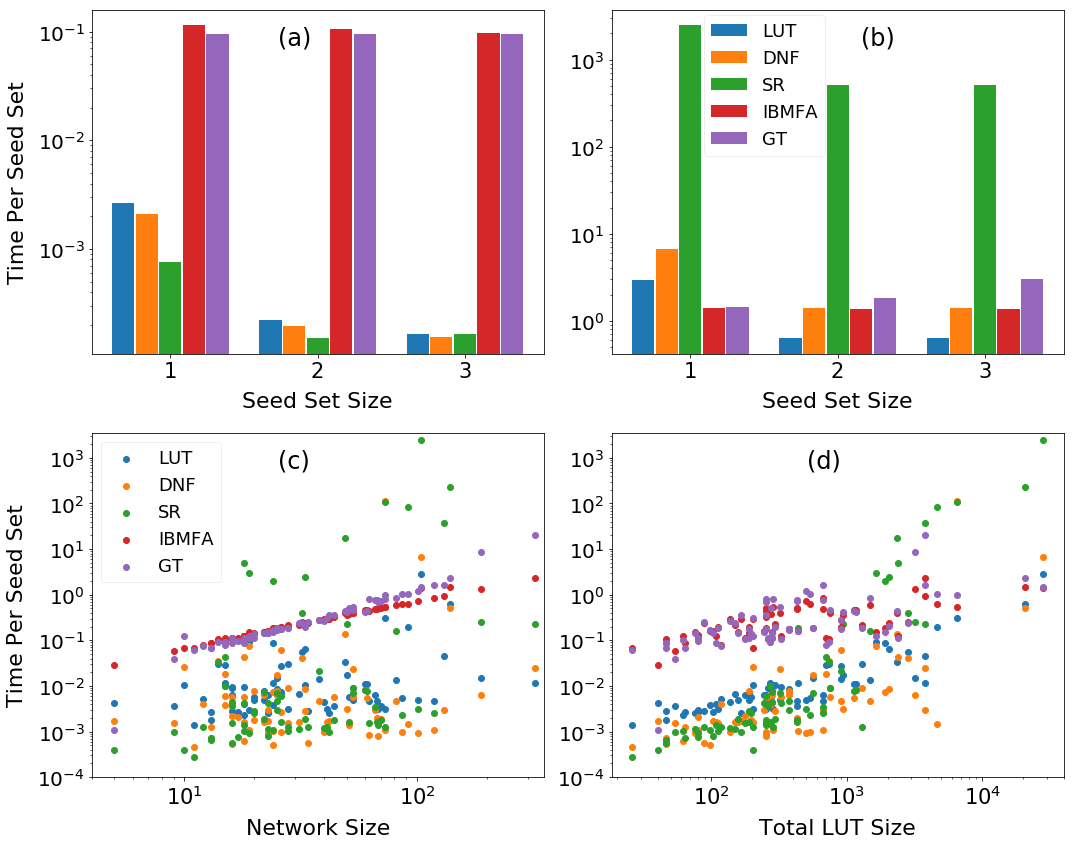

In [428]:
plt.figure(figsize=(15,12))
num=3 #how many seed set sizes to compare
subnetworks=['Body Segmentation in Drosophila 2013','EGFR & ErbB Signaling'] 

#average times for specific networks
for index,n in enumerate(subnetworks):
    plt.subplot(221+index)
    averageSR=[np.mean([times[n]['SR'][i]+times[n]['SR TN']/(sizes[n][i])]) for i in range(1,num+1)] #with DCM TN
    averageltn=[np.mean([times[n]['LUT'][i]+times[n]['LUT TN']/(sizes[n][i])]) for i in range(1,num+1)] #with LUT TN
    averagedtn=[np.mean([times[n]['DNF'][i]+times[n]['DNF TN']/(sizes[n][i])]) for i in range(1,num+1)] #with DNF TN
    averageMF=[np.mean([times[n]['MF'][i]]) for i in range(1,num+1)]
    averageSim=[np.mean([times[n]['BF'][i] if 'BF' in times[n] else times[n]['Sim'][i]]) for i in range(1,num+1)]
    xvalues=[1,2,3]
    width=0.15

    plt.bar([x-2*width-.02 for x in xvalues],averageltn,label='LUT',width=width) #x-2*width-.02
    plt.bar([x-1*width-.01 for x in xvalues],averagedtn,label='DNF',width=width)
    plt.bar([x for x in xvalues],averageSR,label='SR',width=width) #x
    plt.bar([x+1*width+.01 for x in xvalues],averageMF,label='IBMFA',width=width) #x+width+.01
    plt.bar([x+2*width+.02 for x in xvalues],averageSim,label='GT',width=width) #x+2*width+.02, 'Sim' or 'GT'
    plt.xticks([1,2,3],[1,2,3],fontsize=21) #fontsize=18, 21, 24
    plt.yticks(fontsize=20) #fontsize=18, 20, 24
    if index==0: plt.ylabel("Time Per Seed Set",fontsize=22,labelpad=10,)#position=(1.3,1)), fontsize=20, 26
    if index==1:
        plt.legend(fontsize=18,framealpha=0.3,bbox_to_anchor=(0.185, 0.55)) #(0.185, 0.55), fontsize=16, bbox_to_anchor=(0.185, 0.95),(0.82, 0.75)
    plt.xlabel("Seed Set Size",fontsize=22,labelpad=10,) #position=(1.3,1), fontsize=20, 26
    plt.yscale('log',basey=10)


#average times for the cell collective
num=1 #which seed set size to compare; note: normalization below does not work with seed sizes other than num=1
subnetworks=[n for n in times if times[n] and 'DNF' in times[n] and 1 in times[n]['DNF']]

yvaluesSR=[times[n]['SR'][num]+times[n]['SR TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with DCM TN, normalized per node
yvaluesltn=[times[n]['LUT'][num]+times[n]['LUT TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with LUT TN, normalized per node
yvaluesdtn=[times[n]['DNF'][num]+times[n]['DNF TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with DNF TN, normalized per node
yvaluesMF=[times[n]['MF'][num] for n in subnetworks]
yvaluesSim=[times[n]['BF'][num] if 'BF' in times[n] else times[n]['Sim'][num] for n in subnetworks]
x1values=[cell_stats[n]['size'] for n in subnetworks]
x2values=[lut_sizes[n] for n in subnetworks]
#print len(x1values),len(x2values)
labels=['Network Size','Total LUT Size']

for index in range(2):
    plt.subplot(223+index)
    xvalues=eval('x'+str(index+1)+'values')
    plt.scatter(xvalues,yvaluesltn,label='LUT')
    plt.scatter(xvalues,yvaluesdtn,label='DNF')
    plt.scatter(xvalues,yvaluesSR,label='SR')
    plt.scatter(xvalues,yvaluesMF,label='IBMFA')
    plt.scatter(xvalues,yvaluesSim,label='GT') #'Sim' or 'GT'
    plt.xticks(fontsize=21) #fontsize=18, 21, 24
    plt.yticks(fontsize=20) #fontsize=18, 20, 24
    plt.xlabel(labels[index],fontsize=22,labelpad=10) #fontsize=20, 26
    if index==0: 
        plt.ylabel("Time Per Seed Set",fontsize=22,labelpad=10,)#position=(1.3,1)), fontsize=20, 26
        plt.xlim([4,350])
        plt.legend(fontsize=18,framealpha=0.3,) #fontsize=18, framealpha=0.8, no bbox, bbox_to_anchor=(0.33,0.51)
    plt.yscale('log',basey=10)
    plt.xscale('log',basex=10)
    plt.ylim([.0001,3500])

plt.tight_layout(pad=1.0) #pad=1.0
plt.subplots_adjust(hspace=0.23) #better alternative to tight_layout, use for larger font sizes, hspace=0.3
#plt.figtext(0.26, 0.825, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
#plt.figtext(0.8, 0.825, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
#plt.figtext(0.26, 0.395, "(c)", wrap=True, horizontalalignment='left', fontsize=20)
#plt.figtext(0.75, 0.395, "(d)", wrap=True, horizontalalignment='left', fontsize=20) #0.75, 0.395
plt.figtext(0.26, 0.93, "(a)", wrap=True, horizontalalignment='left', fontsize=24) #0.26, 0.80
plt.figtext(0.8, 0.93, "(b)", wrap=True, horizontalalignment='left', fontsize=24) #0.8, 0.80
plt.figtext(0.26, 0.44, "(c)", wrap=True, horizontalalignment='left', fontsize=24) #0.26, 0.385
plt.figtext(0.75, 0.44, "(d)", wrap=True, horizontalalignment='left', fontsize=24) #0.75, 0.385
#plt.figtext(0.26, 0.93, "(a)", wrap=True, horizontalalignment='left', fontsize=26)
#plt.figtext(0.7, 0.93, "(b)", wrap=True, horizontalalignment='left', fontsize=26)
#plt.figtext(0.26, 0.425, "(c)", wrap=True, horizontalalignment='left', fontsize=26)
#plt.figtext(0.7, 0.425, "(d)", wrap=True, horizontalalignment='left', fontsize=26)
#plt.savefig('time_comparison_cell_collective_larger4.pdf',format='pdf', bbox_inches='tight')

#### Figure 4

In [371]:
with open('cell_collective_analysis.txt') as fp:
    stats=eval(fp.read())
len(stats)

75

Comparing 74 networks size [1.465347951821734, 2.9552941303743565, 4.443014157014156] 2.954552079736749
similarity [0.37230776748756833, 0.4071600320489913, 0.44691320148480285] 0.40879366700712083
recall [0.37230776748756833, 0.4071600320489913, 0.44691320148480285] 0.40879366700712083
precision [1.0, 1.0, 1.0] 1.0


Text(0.65,0.435,'(d)')

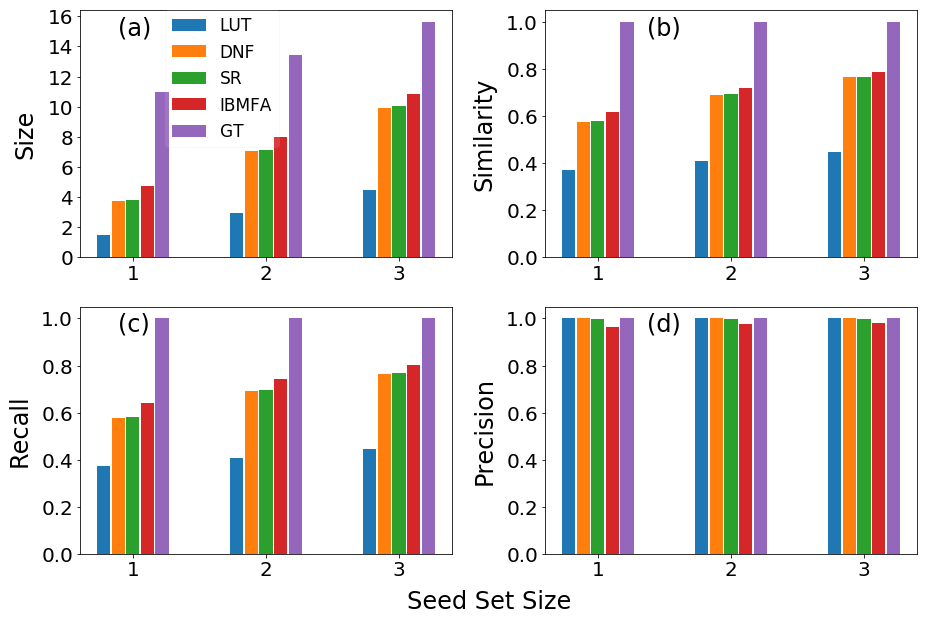

In [374]:
#statistics for the Cell Collective (average size, similarity, recall, or precision)
plt.figure(figsize=(15,10))
num=3 #how many seed set sizes to compare
subnetworks=[n for n in stats if 'DNF TN' in stats[n]]# and cell_stats[n]['size']>9 and cell_stats[n]['size']<15] #N=[10,13]
print 'Comparing %d networks' % len(subnetworks),#[n for n in subnetworks]
keys=['size','similarity','recall','precision']

for index,n in enumerate(keys):
    plt.subplot(221+index)
    stat=keys[index]
    averageSR=[np.mean([stats[n]['SR TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
    averagedtn=[np.mean([stats[n]['DNF TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
    averageltn=[np.mean([stats[n]['LUT TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
    averageMF=[np.mean([stats[n]['MF'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
    averageSim=[np.mean([stats[n]['ground-truth'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
    xvalues=[1,2,3]
    width=0.1
    print stat,averageltn,np.mean(averageltn)
    #for y in [averageSR,averagedtn,averageltn,averageMF,averageSim]:
    #    for i,x in enumerate(y): y[i]=round(x,2)

    plt.bar([x-2.0*width-.02 for x in xvalues],averageltn,label='LUT',width=width) #x-2*width-.02
    plt.bar([x-1.0*width-.01 for x in xvalues],averagedtn,label='DNF',width=width)
    plt.bar([x for x in xvalues],averageSR,label='SR',width=width) #x
    plt.bar([x+1.0*width+.01 for x in xvalues],averageMF,label='IBMFA',width=width) #x+width+.01
    plt.bar([x+2.0*width+.02 for x in xvalues],averageSim,label='GT',width=width) #x+2*width+.02, 'Sim' or 'GT'
    plt.xticks([1,2,3],[1,2,3],fontsize=20) #fontsize=18
    plt.yticks(fontsize=20)
    if index==2: plt.xlabel("Seed Set Size",fontsize=24,labelpad=10,position=(1.1,1)) #fontsize=20, 18
    #plt.ylabel("avg. "+stat,fontsize=20,labelpad=10)
    plt.ylabel(stat.title(),fontsize=24,labelpad=10) #fontsize=18
    #plt.ylim([0,7])
    if index==0: 
        plt.legend(fontsize=17,framealpha=0.1,bbox_to_anchor=(0.558, 0.41)) #fontsize=14, framealpha=0.3,bbox_to_anchor=(0.4, 0.5),(0.55, 0.45)
        
#plt.tight_layout(pad=1.0)
plt.subplots_adjust(wspace=0.25) #better alternative to tight_layout, use for larger font sizes
plt.figtext(0.16, 0.845, "(a)", wrap=True, horizontalalignment='left', fontsize=24) #fontsize=20
plt.figtext(0.65, 0.845, "(b)", wrap=True, horizontalalignment='left', fontsize=24)
plt.figtext(0.16, 0.435, "(c)", wrap=True, horizontalalignment='left', fontsize=24)
plt.figtext(0.65, 0.435, "(d)", wrap=True, horizontalalignment='left', fontsize=24) #0.75, 0.395
#plt.savefig('influence_set_stats_cell_collective_larger2.pdf',format='pdf', bbox_inches='tight')

#### Figure 5

In [86]:
with open('cell_collective_rankings.txt') as fp:
    rankings=eval(fp.read())
len(rankings)

75

Comparing 74 networks
[0.6795807968782018, 0.7456075212227182, 0.7829013807236127] [0.684816857373684, 0.7634617118037682, 0.7970917652785462] [0.3380467128416942, 0.333575337278115, 0.3324344115183207]


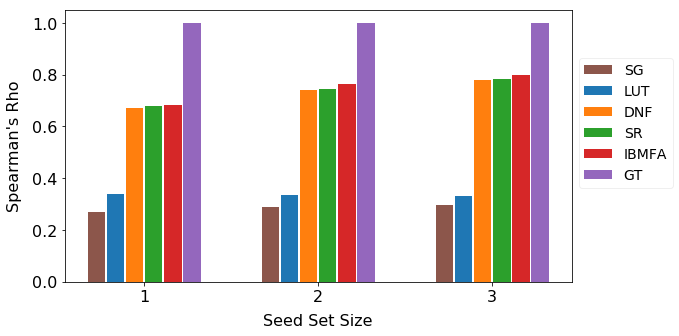

In [88]:
#rankings of seed sets on the Cell Collective
plt.figure(figsize=(20,5))
plt.subplot(121) #for consistent sizing
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
num=3 #how many seed set sizes to compare
subnetworks=[n for n in rankings if rankings[n]['SR']]
print 'Comparing %d networks' % len(subnetworks)

averageSR=[np.mean([rankings[n]['SR'][i] for n in subnetworks]) for i in range(1,num+1)]
averagedtn=[np.mean([rankings[n]['DNF'][i] for n in subnetworks]) for i in range(1,num+1)]
averageltn=[np.mean([rankings[n]['LUT'][i] for n in subnetworks]) for i in range(1,num+1)]
averageMF=[np.mean([rankings[n]['MF'][i] for n in subnetworks]) for i in range(1,num+1)]
averageSim=[np.mean([rankings[n]['Sim'][i] for n in subnetworks]) for i in range(1,num+1)]
corrSG_deg=[np.mean([rankings[n]['out-degree'][i] for n in subnetworks]) for i in range(1,num+1)]
xvalues=[1,2,3]
width=0.10
print averageSR,averageMF,averageltn

plt.bar([x-2.5*width-.025 for x in xvalues],corrSG_deg,label='SG',width=width,color=colors[5])
plt.bar([x-1.5*width-.015 for x in xvalues],averageltn,label='LUT',width=width,color=colors[0]) #x-2*width-.02
plt.bar([x-0.5*width-.005 for x in xvalues],averagedtn,label='DNF',width=width,color=colors[1])
plt.bar([x+0.5*width+.005 for x in xvalues],averageSR,label='SR',width=width,color=colors[2]) #x
plt.bar([x+1.5*width+.015 for x in xvalues],averageMF,label='IBMFA',width=width,color=colors[3]) #x+width+.01
plt.bar([x+2.5*width+.025 for x in xvalues],averageSim,label='GT',width=width,color=colors[4]) #x+2*width+.02, 'Sim' or 'GT'
#plt.bar([x+3*width+.03 for x in xvalues],averageSim,label='Sim',width=width)
plt.xticks([1,2,3],[1,2,3],fontsize=16) #fontsize=16
plt.yticks(fontsize=16)
plt.xlabel("Seed Set Size",fontsize=16,labelpad=10) #fontsize=18
plt.ylabel("Spearman's Rho",fontsize=16,labelpad=10)
plt.legend(fontsize=14,framealpha=0.3,bbox_to_anchor=(1.0, 0.85)) #fontsize=18
#plt.savefig('rankings_cell_collective2.pdf',format='pdf', bbox_inches='tight')

### Supplementary Materials

#### Figure 1

In [375]:
#plot size comparisons for nodes/edges
with open('gtn_nodes.txt') as fp:
    gtn_nodes=eval(fp.read())
with open('gtn_edges.txt') as fp:
    gtn_edges=eval(fp.read())
len(gtn_nodes),len(gtn_edges)

(74, 74)

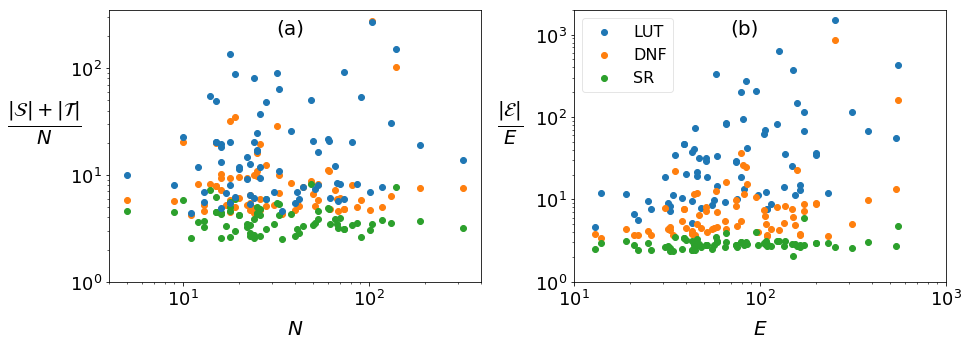

In [391]:
#nodes
plt.figure(figsize=(15,5))
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.subplot(121)
xvalues=[gtn_nodes[n]['SG'] for n in gtn_nodes]
y1values=[gtn_nodes[n]['DNF']/float(gtn_nodes[n]['SG']) for n in gtn_nodes] #/float(gtn_nodes[n]['SG'])
y2values=[gtn_nodes[n]['SR']/float(gtn_nodes[n]['SG']) for n in gtn_nodes]
y3values=[gtn_nodes[n]['LUT']/float(gtn_nodes[n]['SG']) for n in gtn_nodes]
plt.scatter(xvalues,y1values,label='DNF',color=colors[1])
plt.scatter(xvalues,y2values,label='SR',color=colors[2])
plt.scatter(xvalues,y3values,label='LUT',color=colors[0])

plt.xticks(fontsize=18) #fontsize=16
plt.yticks(fontsize=18)
plt.xlabel(r'$N$',fontsize=20,labelpad=10) #fontsize=18, "Network Size", r'$N_{\mathcal{B}}$'
#plt.ylabel(r'Normalized $N_{\mathcal{G}}$',fontsize=18,labelpad=10) #$N_{GTN}$
#plt.ylabel(r'$\frac{2N+M}{N}$',fontsize=28,rotation=0,labelpad=25)
plt.ylabel(r'$\frac{|\mathcal{S}| + |\mathcal{T}|}{N}$',fontsize=28,rotation=0,labelpad=25)
plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.ylim([1,350])
plt.xlim([4,400])
#plt.legend(fontsize=16,framealpha=0.5,loc='upper left') #bbox_to_anchor=(1.0, 0.85)

#edges
plt.subplot(122)
xvalues=[gtn_edges[n]['SG'] for n in gtn_edges]
y1values=[gtn_edges[n]['DNF']/float(gtn_edges[n]['SG']) for n in gtn_edges] #/float(gtn_edges[n]['SG'])
y2values=[gtn_edges[n]['SR']/float(gtn_edges[n]['SG']) for n in gtn_edges]
y3values=[gtn_edges[n]['LUT']/float(gtn_edges[n]['SG']) for n in gtn_edges]
plt.scatter(xvalues,y3values,label='LUT',color=colors[0])
plt.scatter(xvalues,y1values,label='DNF',color=colors[1])
plt.scatter(xvalues,y2values,label='SR',color=colors[2])

plt.xticks(fontsize=18) #fontsize=16
plt.yticks(fontsize=18)
plt.xlabel(r'$E$',fontsize=20,labelpad=10) #fontsize=18, "Number of Edges", r'$E_{\mathcal{B}}$'
#plt.ylabel(r'Normalized $E_{\mathcal{G}}$',fontsize=18,labelpad=5) #$E_{\mathcal{T}}$ or $E_{GTN}$
plt.ylabel(r'$\frac{|\mathcal{E}|}{E}$',fontsize=28,rotation=0,labelpad=25)
plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.ylim([1,2000])
plt.xlim([10,1000])
plt.legend(fontsize=16,framealpha=0.5,loc='upper left')
plt.subplots_adjust(wspace=0.25) #better alternative to tight_layout, use for alternate y labels
plt.figtext(0.28, 0.815, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.7, 0.815, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
#plt.savefig('GTN_representation_sizes5.pdf',format='pdf', bbox_inches='tight')

#### Figure 2

In [329]:
#plot similarities between methods
with open('cell_collective_similarities.txt') as fp:
    sim=eval(fp.read())
len(sim)

74

Comparing 74 networks


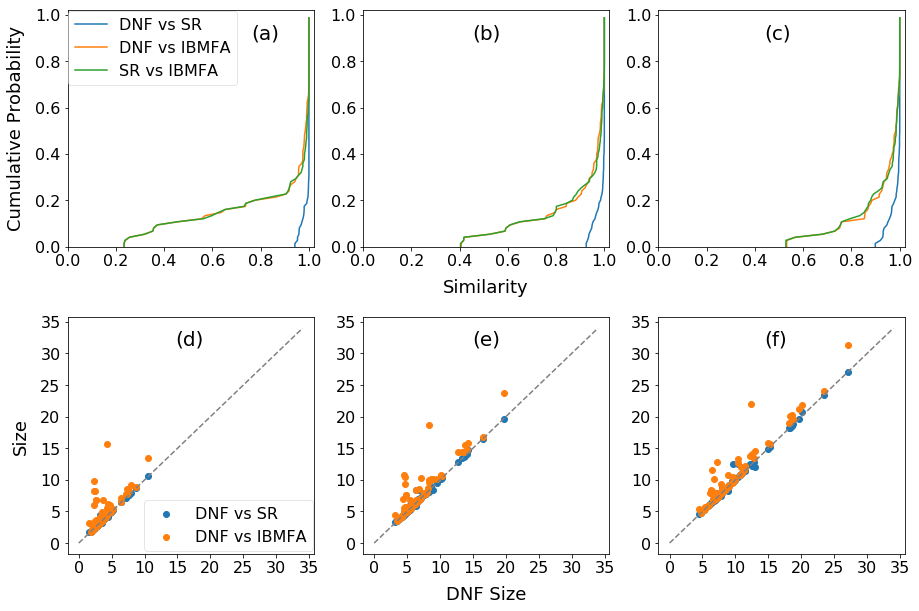

In [366]:
#visualize size as A v B plots
plt.figure(figsize=(15,10))
sizes=3 #how many seed set sizes to compare
stat='size'
subnetworks=[n for n in rankings if n in sim] #and cell_stats[n]['max_k']<14]
print 'Comparing %d networks' % len(subnetworks)
#xvalues=[cell_stats[n]['size'] for n in subnetworks]

for num in range(1,sizes+1):
    plt.subplot(230+num)
    y1values,y2values,y3values=[0],[0],[0]
    y1values.extend([sim[n]['DNF TN']['SR TN'][num] for n in subnetworks])
    y2values.extend([sim[n]['DNF TN']['MF'][num] for n in subnetworks])
    y3values.extend([sim[n]['SR TN']['MF'][num] for n in subnetworks])
    y1values,y2values,y3values=sorted(y1values),sorted(y2values),sorted(y3values)
    y1values[0],y2values[0],y3values[0]=y1values[1],y2values[1],y3values[1] #add connection to x-axis line
    #print xvalues[:10],y1values[:10],y2values[:10],y3values[:10]
    labels=['DNF vs SR','DNF vs IBMFA','SR vs IBMFA']
    yvalues=[sorted(y1values),sorted(y2values),sorted(y3values)]
    
    for k in range(3):
        plt.plot(yvalues[k],[float(i)/len(yvalues[k]) for i in range(len(yvalues[k]))],label=labels[k])
    #plt.xlabel('Similarity',fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim([0,1.02])
    plt.ylim([0,1.02])
    if num==1: 
        plt.ylabel("Cumulative Probability",fontsize=18,labelpad=10)
        plt.legend(fontsize=16,framealpha=0.5,loc='upper left',bbox_to_anchor=(-.03,1.03)) #fontsize=14, no bbox, loc='upper left'
    if num==2: plt.xlabel('Similarity',fontsize=18,labelpad=10)

for num in range(1,sizes+1):
    plt.subplot(233+num)
    y1values=[stats[n]['DNF TN'][stat][num] for n in subnetworks]
    y2values=[stats[n]['SR TN'][stat][num] for n in subnetworks]
    y3values=[stats[n]['MF'][stat][num] for n in subnetworks]
    labels=['DNF','SR','IBMFA']
    yvalues=[y1values,y2values,y3values]

    for i in range(2):
        #plt.subplot(234+i)
        j,k=i/2+1,(i+1)/2+2
        #print 'y'+str(j)+'values','y'+str(k)+'values',labels[j-1],labels[k-1]
        plt.scatter(eval('y'+str(j)+'values'),eval('y'+str(k)+'values'),label=labels[j-1]+' vs '+labels[k-1])
    #plt.xlabel(labels[j-1],fontsize=18)
    #plt.ylabel(labels[k-1],fontsize=18)
    #plt.xlabel('DNF Size',fontsize=18,labelpad=10)
    plt.plot([x for x in range(35)],[x for x in range(35)],'--',color='grey')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    if num==1:
        plt.ylabel('Size',fontsize=18,labelpad=10)
        plt.legend(fontsize=16,framealpha=0.5,loc='lower right',bbox_to_anchor=(1.03,-.02)) #fontsize=14, no bbox
    if num==2: plt.xlabel('DNF Size',fontsize=18,labelpad=10)

plt.subplots_adjust(hspace=0.3) #better alternative to tight_layout, use for alternate spacing
plt.figtext(0.295, 0.84, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.5, 0.84, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.77, 0.84, "(c)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.225, 0.415, "(d)", wrap=True, horizontalalignment='left', fontsize=20) #0.225, 0.43
plt.figtext(0.5, 0.415, "(e)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.77, 0.415, "(f)", wrap=True, horizontalalignment='left', fontsize=20)
#plt.savefig('influence_similarities2.pdf',format='pdf', bbox_inches='tight')

#### Figure 3

In [99]:
#plot stats over time
with open('cell_collective_analysis.txt') as fp:
    stats=eval(fp.read())
len(stats)

75

Comparing 74 networks


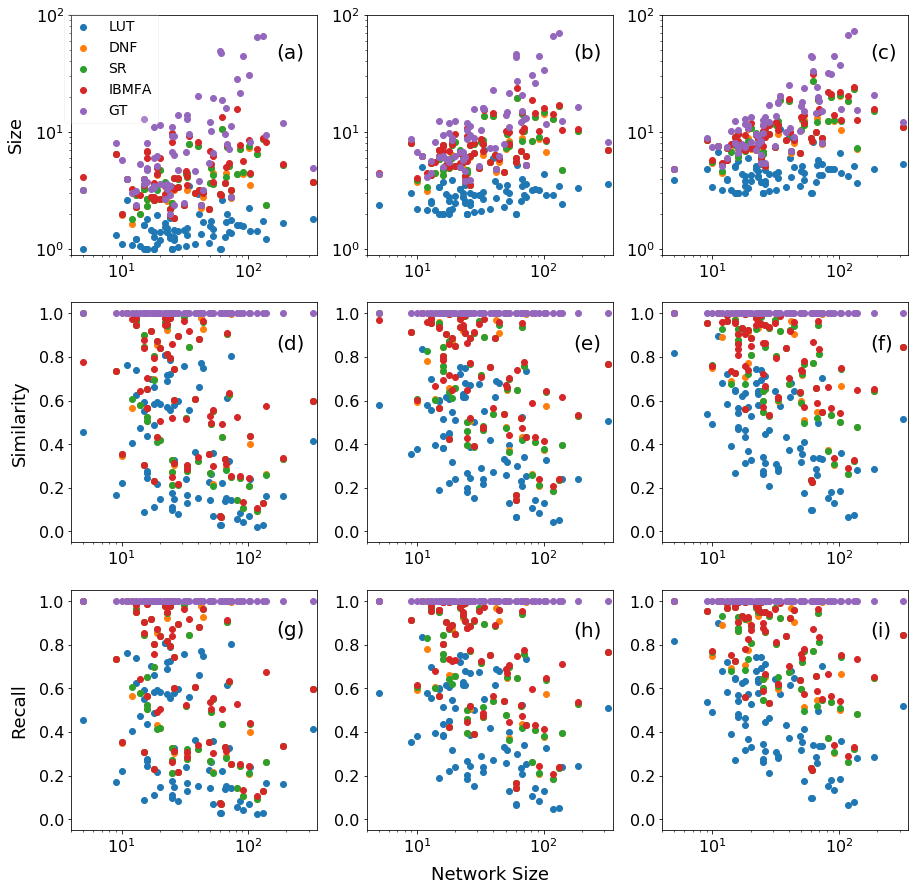

In [101]:
from scipy.stats import pearsonr
plt.figure(figsize=(15,15))
sizes=3 #how many seed set sizes to compare
subnetworks=[n for n in stats if 'SR TN' in stats[n] and stats[n]['SR TN']]
print 'Comparing %d networks' % len(subnetworks)
stat_names=['size','similarity','recall']
xvalues=[cell_stats[n]['size'] for n in subnetworks]

for index,stat in enumerate(stat_names):
    for num in range(1,sizes+1):
        plt.subplot(330+index*sizes+num)
        yvaluesSR=[stats[n]['SR TN'][stat][num] for n in subnetworks]
        yvaluesltn=[stats[n]['LUT TN'][stat][num] for n in subnetworks]
        yvaluesdtn=[stats[n]['DNF TN'][stat][num] for n in subnetworks]
        yvaluesMF=[stats[n]['MF'][stat][num] for n in subnetworks]
        yvaluesSim=[stats[n]['ground-truth'][stat][num] for n in subnetworks]
        #print stat,num,len(xvalues),pearsonr(xvalues,yvaluesMF)
        
        plt.scatter(xvalues,yvaluesltn,label='LUT')
        plt.scatter(xvalues,yvaluesdtn,label='DNF')
        plt.scatter(xvalues,yvaluesSR,label='SR')
        plt.scatter(xvalues,yvaluesMF,label='IBMFA')
        plt.scatter(xvalues,yvaluesSim,label='GT') #'Sim' or 'GT'
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        
        if num==1: plt.ylabel(stat.title(),fontsize=18,labelpad=10)
        if stat=='size':
            plt.yscale('log',basey=10)
            plt.ylim([.9,100])
        else: 
            plt.ylim([-.05,1.05])
        if stat=='size' and num==1: plt.legend(fontsize=14,framealpha=0.2,bbox_to_anchor=(0.38, 0.52))
        if stat=='recall' and num==2: plt.xlabel("Network Size",fontsize=18,labelpad=10)
        plt.xscale('log',basex=10)
        plt.xlim([4,350])

plt.figtext(0.315, 0.84, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.59, 0.84, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.865, 0.84, "(c)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.315, 0.57, "(d)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.59, 0.57, "(e)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.865, 0.57, "(f)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.315, 0.305, "(g)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.59, 0.305, "(h)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.865, 0.305, "(i)", wrap=True, horizontalalignment='left', fontsize=20)
#plt.savefig('stats_per_size2.pdf',format='pdf', bbox_inches='tight')

#### Figure 4

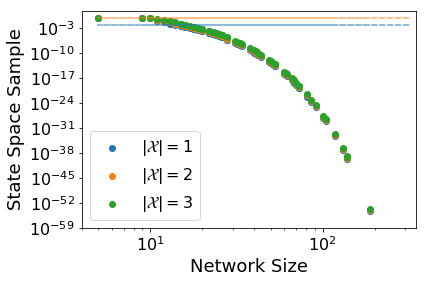

In [105]:
#% of state space sampled, assuming R=100 runs
runs=100.0
xvalues=[cell_stats[n]['size'] for n in cell_stats]
y1values=[runs/(2**(cell_stats[n]['size']-1)) if cell_stats[n]['size']>10 else 1.0 for n in cell_stats] #N=10 or less, we use bruteforce
y2values=[runs/(2**(cell_stats[n]['size']-2)) if cell_stats[n]['size']>10 else 1.0 for n in cell_stats]
y3values=[runs/(2**(cell_stats[n]['size']-3)) if cell_stats[n]['size']>10 else 1.0 for n in cell_stats]
#print len(xvalues),zip(sorted(xvalues),sorted(y3values,reverse=True))

plt.scatter(xvalues,y1values,label=r'$|\mathcal{X}|=1$') #specify seed set size, label=r'$|\mathcal{X}|=1$' or 's=1'
plt.scatter(xvalues,y2values,label=r'$|\mathcal{X}|=2$') #specify seed set size
plt.scatter(xvalues,y3values,label=r'$|\mathcal{X}|=3$') #specify seed set size
plt.plot(xvalues,[.01 for x in xvalues],'--',alpha=0.5)
plt.plot(xvalues,[1.0 for x in xvalues],'--',alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Network Size",fontsize=18)
plt.ylabel("State Space Sample",fontsize=18)
plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.ylim([10e-60,100])
plt.xlim([4,350])
plt.legend(fontsize=16)
#plt.savefig('state_space_sampled2.pdf',format='pdf', bbox_inches='tight')

#### Figure 5

In [106]:
#comparison to brute-force for small networks
with open('cell_collective_bruteforce_analysis.txt') as fp:
    bruteforce_stats=eval(fp.read())
len(bruteforce_stats),[cell_stats[n]['size'] for n in bruteforce_stats]

(6, [13, 10, 13, 12, 14, 11])

Comparing 6 networks ['Arabidopsis thaliana Cell Cycle', 'Lac Operon', 'Mammalian Cell Cycle 2006', 'Metabolic Interactions in the Gut Microbiome', 'Toll Pathway of Drosophila Signaling Pathway', 'Regulation of the L-arabinose operon of Escherichia coli']


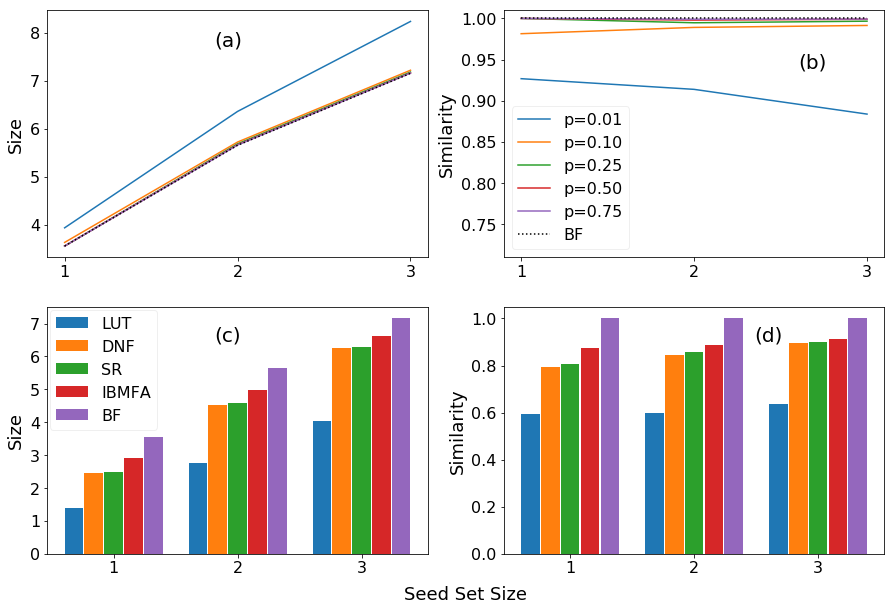

In [109]:
#statistics for the Cell Collective (average size, similarity, recall, or precision)
plt.figure(figsize=(15,10))
num=3
subnetworks=[n for n in stats if 'DNF TN' in stats[n] and cell_stats[n]['size']>9 and cell_stats[n]['size']<15] #N=[10,14]
print 'Comparing %d networks' % len(subnetworks),[n for n in subnetworks]
keys=['size','similarity'] #,'recall','precision']
xvalues=[1,2,3]
width=0.15
labels=['p=0.'+p for p in ['01','10','25','50','75']]

for index,stat in enumerate(keys):
    plt.subplot(221+index) #compare p values
    averageSR=[np.mean([bruteforce_stats[n]['SR TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
    averagedtn=[np.mean([bruteforce_stats[n]['DNF TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
    averageltn=[np.mean([bruteforce_stats[n]['LUT TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
    averageMF=[np.mean([bruteforce_stats[n]['MF'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
    averageSim=[np.mean([bruteforce_stats[n]['ground-truth'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
    for key in ['sim'+p for p in ['01','10','25','50','75']]:
        exec('average'+key+'=[np.mean([bruteforce_stats[n][key][stat][i] for n in subnetworks]) for i in range(1,num+1)]')
        #print eval('average'+key)
        
    for i,key in enumerate(['sim'+p for p in ['01','10','25','50','75']]): #pass
        plt.plot(xvalues,eval('average'+key),label=labels[i])
    if stat=='size' or stat: plt.plot(xvalues,averageSim,':',label='BF',color='black') #label='bruteforce' or 'BF'
    plt.xticks([1,2,3],[1,2,3],fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel(stat.title(),fontsize=18,labelpad=5)
    if index==1: 
        plt.ylim([0.71,1.01])
        plt.legend(fontsize=16,framealpha=0.3,) #bbox_to_anchor=(1.0, 0.95))
    
    
    plt.subplot(223+index) #compare stats
    plt.bar([x-2*width-.02 for x in xvalues],averageltn,label='LUT',width=width) #x-2*width-.02
    plt.bar([x-width-.01 for x in xvalues],averagedtn,label='DNF',width=width)
    plt.bar([x for x in xvalues],averageSR,label='SR',width=width) #x
    plt.bar([x+width+.01 for x in xvalues],averageMF,label='IBMFA',width=width) #x+width+.01
    plt.bar([x+2*width+.02 for x in xvalues],averageSim,label='BF',width=width) #x+2*width+.02
    plt.xticks([1,2,3],[1,2,3],fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel(stat.title(),fontsize=18,labelpad=5)
    if index==0:
        plt.xlabel("Seed Set Size",fontsize=18,labelpad=10,position=(1.1,1))
        plt.legend(fontsize=16,framealpha=0.3,bbox_to_anchor=(0.31, 1.02))
    #plt.ylim([0,7])
    
plt.figtext(0.28, 0.83, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.82, 0.8, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.28, 0.42, "(c)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.78, 0.42, "(d)", wrap=True, horizontalalignment='left', fontsize=20) #0.75, 0.395
#plt.savefig('stats_bruteforce2.pdf',format='pdf', bbox_inches='tight')

#### Figure 6

In [110]:
#compare DNF to DNF with prime implicants
with open('cell_collective_times_PIs.txt') as fp:
    times=eval(fp.read())
with open('cell_collective_analysis_PIs.txt') as fp:
    stats=eval(fp.read())
len(stats),len(times)

(75, 75)

Comparing 71 networks
71


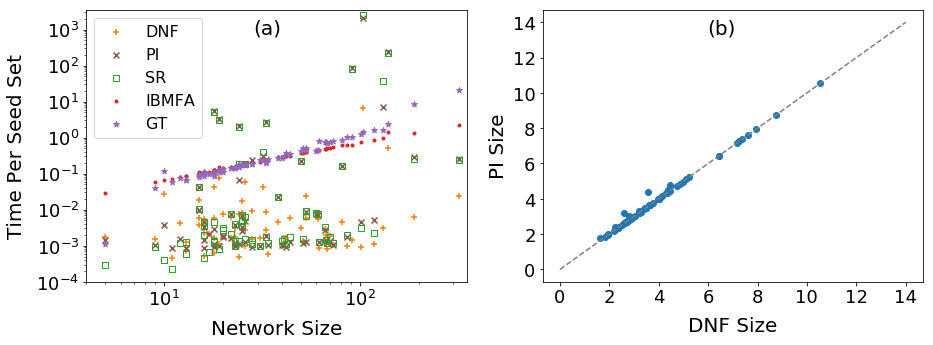

In [112]:
plt.figure(figsize=(15,5))
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.subplot(121)
#times
num=1 #which seed set size to compare; note: normalization below does not work with seed sizes other than num=1
discards=['Yeast Apoptosis','Arabidopsis thaliana Cell Cycle','Stomatal Opening Model'] #discard if comparing DNF vs DNF PI
subnetworks=[n for n in times if times[n] and 'DNF PI' in times[n] and num in times[n]['DNF PI'] and n not in discards]
print 'Comparing %d networks' % len(subnetworks)

yvaluesSR=[times[n]['SR'][num]+times[n]['SR TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with DCM TN, normalized per node
yvaluesltn=[times[n]['LUT'][num]+times[n]['LUT TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with LUT TN, normalized per node
yvaluesdtn=[times[n]['DNF'][num]+times[n]['DNF TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with DNF TN, normalized per node
yvaluesPI=[times[n]['DNF PI'][num]+times[n]['DNF PI TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with DNF PI TN, normalized per node
yvaluesMF=[times[n]['MF'][num] for n in subnetworks]
yvaluesSim=[times[n]['BF'][num] if 'BF' in times[n] else times[n]['Sim'][num] for n in subnetworks]
xvalues=[cell_stats[n]['size'] for n in subnetworks]
print len(xvalues)

plt.scatter(xvalues,yvaluesdtn,label='DNF',marker='+',color=colors[1]) #marker='*',
plt.scatter(xvalues,yvaluesPI,label='PI',marker='x',color=colors[5]) #marker='+',
plt.scatter(xvalues,yvaluesSR,label='SR',marker='s',facecolor='none',color=colors[2]) #marker='x',
plt.scatter(xvalues,yvaluesMF,label='IBMFA',marker='.',color=colors[3]) #marker='.',
plt.scatter(xvalues,yvaluesSim,label='GT',marker='*',color=colors[4]) #marker='o', label='Sim' or 'GT'
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Network Size',fontsize=20,labelpad=10)
plt.ylabel("Time Per Seed Set",fontsize=20,labelpad=10,)#position=(1.3,1))
plt.xlim([4,350])
plt.legend(fontsize=16,framealpha=0.8)
plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.ylim([.0001,3500])

#size comparison
plt.subplot(122)
num=1 #which seed set size to compare
stat='size'
y1values=[stats[n]['DNF TN'][stat][num] for n in subnetworks]
#y2values=[stats[n]['SR TN'][stat][num] for n in subnetworks]
#y3values=[stats[n]['MF'][stat][num] for n in subnetworks]
y4values=[stats[n]['DNF PI TN'][stat][num] for n in subnetworks]

plt.scatter(y1values,y4values) #add to evaluate DNF PI method
plt.xlabel('DNF Size',fontsize=20,labelpad=10)
plt.plot([x for x in range(15)],[x for x in range(15)],'--',color='grey')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('PI Size',fontsize=20,labelpad=5)
#plt.legend(fontsize=16,framealpha=0.5,loc='lower right')

plt.figtext(0.28, 0.815, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.7, 0.815, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
#plt.savefig('DNF_PI_comparison2.pdf',format='pdf', bbox_inches='tight')

#### Extra Dissertation Figures

In [113]:
#Compare perturbation and configuration influence for drosophila
configuration_influence_mf={1:[0.9411764705882353, 0.7987564440155484, 0.7716340532873592, 0.7197154854823246, 0.6825037717091474, 0.680987312822891, 0.6845207768530017, 0.6836477952072739, 0.6871365250048267, 0.6835702474912125, 0.6810278721313227, 0.6781638581067861, 0.6778145393776276, 0.6781652482564356, 0.6789637666782481, 0.6790912549068554],
                        2:[0.8823529411764708, 0.7158040188814826, 0.6679792094232824, 0.6081303783106551, 0.5666221113002504, 0.5532569511477796, 0.5468809939044732, 0.5411651287153485, 0.5391596576677451, 0.5352737859329373, 0.5329467611030771, 0.5309537089607477, 0.5305430623045756, 0.5305034192101611, 0.5307328931957334, 0.530590432805213],
                           3:[0.8235294117647058, 0.6366821963196203, 0.5735097391788644, 0.5106116780558548, 0.4690924162113671, 0.45077444654489285, 0.44040226429739693, 0.4330361103347771, 0.4290845452624598, 0.42544407212667407, 0.42330262786710043, 0.4217576719089416, 0.42126832062956465, 0.42105540056076035, 0.421028742993149, 0.4208245509454403]}
perturbation_influence_mf={1:[0.014705882352941176, 0.024708044982698952, 0.03230941666863782, 0.03887541400173054, 0.04457808427307313, 0.04901998858757813, 0.051629219312269, 0.053185078403639646, 0.05358232071846146, 0.05310477547687219, 0.05250784430616022, 0.052369213078416216, 0.05260031977107125, 0.05289593214129668, 0.053059618871044434, 0.053049996886271704],
                          2:[0.029411764705882255, 0.04862537846020755, 0.06235822591814605, 0.07369403508025309, 0.08319640826824695, 0.08957919408410277, 0.09318727562659476, 0.09535823797421343, 0.0957641316175079, 0.09530183982175265, 0.0947799688612229, 0.09479074457062144, 0.09510770136564169, 0.09541131526489587, 0.09554434806023, 0.0955165456192356],
                          3:[0.04411764705881902, 0.07171820934256028, 0.09015711517069984, 0.10466268775443403, 0.11636698847789956, 0.1229666292863766, 0.12643948758841705, 0.1284964118078774, 0.12858021006796658, 0.12821855680514524, 0.1278997408358037, 0.12808125931808195, 0.1284069584570613, 0.12863828195140797, 0.12869776222909837, 0.12865281756178704]}
inf_correlation_mf={1:['nan', -0.5546402832235161, -0.4738940930859074, -0.4536068308137995, -0.4689055434888012, -0.598439903294866, -0.6789049823166196, -0.7336701881907406, -0.7918933168475842, -0.739336527451802, -0.7343789480751889, -0.7185256200858859, -0.7355058934155714, -0.754321871970088, -0.7613587419986063, -0.7529450930514648],
                   2:['nan', -0.502723503997628, -0.4964667500891019, -0.49860958009433326, -0.5394901830337931, -0.6628485100470201, -0.7545882986039643, -0.7966073837752268, -0.8146084687366919, -0.8039107760221027, -0.7898319210786977, -0.7827954489117598, -0.7882027664089777, -0.7956471797460701, -0.8000703739087147, -0.7990330451165155],
                   3:['nan', -0.484597634757535, -0.4688623490467076, -0.47550491343571055, -0.515095026186789, -0.6260691041904946, -0.7124289493450122, -0.7599937282931819, -0.7848807589342517, -0.7793797165465158, -0.7669359489897799, -0.7580677650556357, -0.7587387529597228, -0.7640333509099783, -0.7686814812163464, -0.7697203159595281]}
configuration_influence_sim={1:[0.9344820855464061, 0.7958406603307469, 0.774682614444681, 0.7276805702127824, 0.7042002647571971, 0.7123581211775899, 0.7146173472464115, 0.7046996308262096, 0.7099757862599811, 0.7094068773044497, 0.7093565399910843, 0.7093565399910843, 0.7093565399910843, 0.7093565399910843, 0.7093565399910843, 0.7093565399910843],
                            2:[0.8759386489111558, 0.7098038708951665, 0.6690014658502252, 0.6181562430085246, 0.5931906984566365, 0.5900667905781414, 0.5891396967484096, 0.5824622727045821, 0.5836033794166011, 0.5828966305701951, 0.5827466177079456, 0.5827466177079456, 0.5827466177079456, 0.5827466177079456, 0.5827466177079456, 0.5827466177079456],
                            3:[0.8175401612629424, 0.6315187973130809, 0.5744828992313133, 0.5219977590479371, 0.4967725847220309, 0.4904296524301921, 0.486935376927953, 0.48299988060689214, 0.4829238616978671, 0.4825216985833308, 0.4824543977356026, 0.4824543977356026, 0.4824543977356026, 0.4824543977356026, 0.4824543977356026, 0.4824543977356026]}
perturbation_influence_sim={1:[0.018962763368189604, 0.02804493713832604, 0.03507188799321021, 0.03928786586638113, 0.04283044905028758, 0.04542237669766767, 0.04658625818140865, 0.047136486620071597, 0.047691718679225226, 0.04763823658273695, 0.04761782135782346, 0.04761782135782346, 0.04761782135782346, 0.04761782135782346, 0.04761782135782346, 0.04761782135782346],
                           2:[0.03366067481383136, 0.05130558783940964, 0.06411504003552645, 0.0717982865966883, 0.0778769735631459, 0.08209249360032746, 0.08372341696707078, 0.08521548548251441, 0.0861116831875995, 0.08607877504662388, 0.08607262349136072, 0.08607262349136072, 0.08607262349136072, 0.08607262349136072, 0.08607262349136072, 0.08607262349136072],
                           3:[0.04826516382011735, 0.07392514490515686, 0.0910367886055354, 0.10092065422165344, 0.10856512268133157, 0.11266358724801531, 0.11381269422607047, 0.11567660328293808, 0.11627931356608402, 0.11624087087507015, 0.11624017984942284, 0.11624017984942284, 0.11624017984942284, 0.11624017984942284, 0.11624017984942284, 0.11624017984942284]}
inf_correlation_sim={1:[-0.17372039724980898, -0.5388846447669977, -0.574025974025974, -0.4970206264323911, -0.5611917494270435, -0.5859434682964094, -0.6678380443086326, -0.6815889992360581, -0.6956455309396485, -0.6956455309396485, -0.6956455309396485, -0.6956455309396485, -0.6956455309396485, -0.6956455309396485, -0.6956455309396485, -0.6956455309396485],
                    2:[-0.14032325706054444, -0.5168474011717166, -0.5332614127226987, -0.556590498183866, -0.5776150134921951, -0.6172008115480235, -0.6657197053695015, -0.6932766316917138, -0.7072833236279896, -0.7058063643777304, -0.7056369285910064, -0.7056369285910064, -0.7056369285910064, -0.7056369285910064, -0.7056369285910064, -0.7056369285910064],
                    3:[-0.13864894187376375, -0.5047192266134656, -0.5092611823334836, -0.539266079569348, -0.5620099021121064, -0.5983955143632363, -0.6462123525374526, -0.6675844386821176, -0.6826909619925496, -0.6812400783307859, -0.6811526264859509, -0.6811526264859509, -0.6811526264859509, -0.6811526264859509, -0.6811526264859509, -0.6811526264859509]}

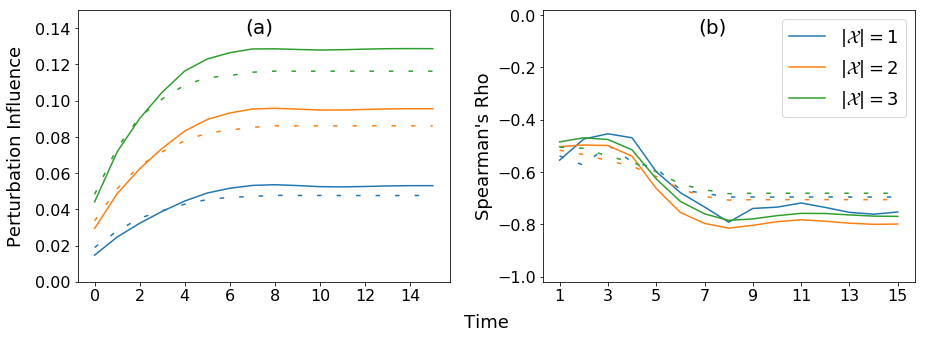

In [116]:
#compare IBMFA to simulations for multiple seed sizes
plt.figure(figsize=(15,5))
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.subplot(121)
for s in perturbation_influence_mf:
    #print influences[s]
    plt.plot([t for t in range(len(perturbation_influence_mf[s]))],perturbation_influence_mf[s],label="s="+str(s))
    plt.plot([t for t in range(len(perturbation_influence_sim[s]))],perturbation_influence_sim[s],'--',dashes=(3, 10),color=colors[s-1],markersize=10)
#plt.title("Average Perturbation Influence",y=1.05)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time',fontsize=18,labelpad=10,position=(1.1,1))
plt.ylabel("Perturbation Influence",fontsize=18,labelpad=10,)#position=(1.3,1))
#plt.legend(fontsize=16,framealpha=0.8) #loc="upper left"
plt.ylim([0,.15])

#correlation between config entropy and perturbation influence
plt.subplot(122)
for s in inf_correlation_mf:
    #print correlations[s]
    plt.plot([t for t in range(1,len(inf_correlation_mf[s]))],inf_correlation_mf[s][1:],label=r'$|\mathcal{X}|=$'+str(s))
    plt.plot([t for t in range(1,len(inf_correlation_sim[s]))],inf_correlation_sim[s][1:],'--',dashes=(3, 10),color=colors[s-1],markersize=10)
#plt.title("Correlation between Configuration and Perturbation Influence",y=1.05)
plt.legend(fontsize=18,framealpha=0.8) #loc="upper left"
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([-1.02,.02])
plt.xticks([1,3,5,7,9,11,13,15])
plt.ylabel(r"Spearman's Rho",fontsize=18,)#labelpad=5) #$\rho$ or Rho
#plt.xlabel("Time",fontsize=16,labelpad=10)
#plt.tight_layout()
plt.subplots_adjust(wspace=0.25) #better alternative to tight_layout

plt.figtext(0.28, 0.817, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.7, 0.817, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
#plt.savefig('influence_comparison_drosophila2.pdf',format='pdf', bbox_inches='tight')

In [117]:
#Compare perturbation and configuration influence across the cell collective
with open('../cell_collective_influence_correlations.txt') as fp:
    corr=eval(fp.read())
with open('../cell_collective_entropies_t10.txt') as fp:
    entropies=eval(fp.read())
with open('../cell_collective_perturbation_t10.txt') as fp:
    diffs=eval(fp.read())

SpearmanrResult(correlation=-0.598472116119175, pvalue=0.00018496476832561456)
Comparing 74 networks
-0.20076675773761035


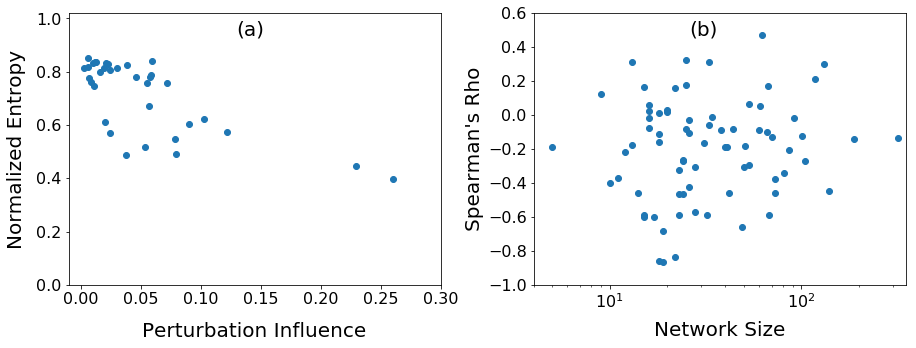

In [119]:
#seed by seed comparison for drosophila
from scipy.stats import spearmanr
plt.figure(figsize=(15,5))
plt.subplot(121)
n='Body Segmentation in Drosophila 2013' #Body Segmentation in Drosophila 2013, Signaling in Macrophage Activation

xvalues=[diffs[n][seed] for seed in diffs[n]]
yvalues=[entropies[n][seed] for seed in diffs[n]]
#print(zip(xvalues,yvalues))
plt.scatter(xvalues,yvalues)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Perturbation Influence",fontsize=20,labelpad=15)
plt.ylabel("Normalized Entropy",fontsize=20,labelpad=10)
plt.ylim([0,1.02])
plt.xlim([-.01,.3])
print spearmanr(xvalues,yvalues)

#correlations per network size for s=1
plt.subplot(122)
num=1
subnetworks=[n for n in cell_stats if cell_stats[n]['max_k']<15]
print 'Comparing %d networks' % len(subnetworks)

xvalues=[cell_stats[n]['size'] for n in subnetworks]
yvalues=[corr[n]['correlation'] for n in subnetworks]
#print(zip(xvalues,yvalues))
plt.scatter(xvalues,yvalues)
#plt.plot([x-1 for x in range(350)],[0 for x in range(350)],'--',alpha=0.5) #x=0 line
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Network Size",fontsize=20,labelpad=10)
plt.ylabel(r"Spearman's Rho",fontsize=20,)#labelpad=5) #$\rho$ or Rho
plt.xscale('log',basex=10)
plt.ylim([-1,0.6])
plt.xlim([4,350])
#print spearmanr(xvalues,yvalues)
print np.mean(yvalues)
plt.subplots_adjust(wspace=0.25) #better alternative to tight_layout

plt.figtext(0.28, 0.817, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.7, 0.817, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
#plt.savefig('influence_comparison_cell_collective2.pdf',format='pdf', bbox_inches='tight')